<a href="https://colab.research.google.com/github/puttipongyy/Dwh/blob/main/Copy_of_Project2_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 : Analyzing data from MovieLens

**Due Date: Sunday, October 11**

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**


## The MovieLens data sets

<img src="https://www.oreilly.com/api/v2/epubs/9781788993753/files/assets/dc0f89d7-6e9c-4790-a6c0-06725f2dbe8a.png">

https://movielens.org

In [94]:
from IPython.lib.display import YouTubeVideo

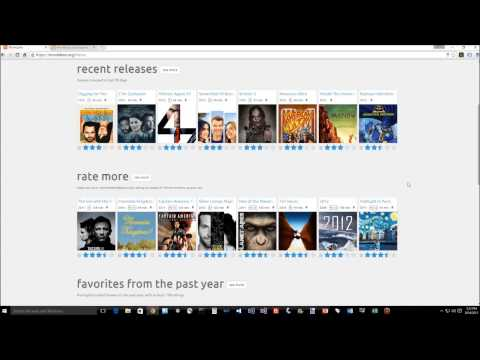

In [95]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

1. <name> <id>
2. <name> <id>
3. <name> <id>
4. <name> <id>
5. <name> <id>

**Objectives**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
    * http://grouplens.org/datasets/movielens/
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Useful Readings:**
* Chapter 14.2 (only the section on the MovieLens 1M Data Set), Chapter 5, 6.2, 7.2, 8, and 9 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (View pivately on Google Classroom).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

**NOTE**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Problem 1:

## Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
* Store the data into an HDF5 file. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html
    * https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html

In [1]:
from google.colab import drive
# To mount at google drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need

users_header = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users = pd.read_table("/content/drive/MyDrive/DataForBig/Proj2/users.dat", sep="::" , header=None, names= users_header )

ratings_header = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings = pd.read_table("/content/drive/MyDrive/DataForBig/Proj2/ratings.dat", sep="::" , header=None, names= ratings_header , encoding ='utf-8')

movies_header = ['MovieID', 'Title', 'Genres']
movies = pd.read_table("/content/drive/MyDrive/DataForBig/Proj2/movies.dat", sep="::" , header=None, names= movies_header, encoding ='latin-1') #utf-8 error something so....

#-------------------------------
# Merge data
movies_ratings = ratings.merge(users, how = 'left', on = 'UserID').merge(movies, how = 'left', on = 'MovieID')

#-------------------------------
# Create a HDF5
movies_ratings.to_hdf("/content/drive/MyDrive/DataForBig/Proj2/movieRating.h5", key="dfKey0")



<ipython-input-3-d244f3ff4558>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table("/content/drive/MyDrive/DataForBig/Proj2/users.dat", sep="::" , header=None, names= users_header )
<ipython-input-3-d244f3ff4558>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table("/content/drive/MyDrive/DataForBig/Proj2/ratings.dat", sep="::" , header=None, names= ratings_header , encoding ='utf-8')
<ipython-input-3-d244f3ff4558>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from 

In [4]:
#-------------------------------
# Reading a HDF5
movieDf = pd.read_hdf("/content/drive/MyDrive/DataForBig/Proj2/movieRating.h5", key="dfKey0")

In [5]:
movieDf

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [6]:
movies_ratings

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [ ]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


<ipython-input-35-bdde0a26e007>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_table("/content/drive/MyDrive/DataForBig/Proj2/movies.dat", sep="::" , header=None, names= movies_header, encoding ='latin-1')


In [ ]:
movies.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Mounted at /content/drive


## Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------





In [ ]:
len(set(movieDf['MovieID']))

3706

In [19]:
movieDf

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [75]:
#How many movies have an average rating over 4.5 overall?
avg_rating = (movieDf.groupby('Title', as_index=False)).agg({'Rating' : 'mean'})
avg_rating[avg_rating['Rating'] >= 4.5].count()

Title     29
Rating    29
dtype: int64

In [109]:
avg_rating

,Title,Rating
0,"$1,000,000 Duck (1971)",3.027027
1,'Night Mother (1986),3.371429
2,'Til There Was You (1997),2.692308
3,"'burbs, The (1989)",2.910891
4,...And Justice for All (1979),3.713568
...,...,...
3701,"Zed & Two Noughts, A (1985)",3.413793
3702,Zero Effect (1998),3.750831
3703,Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000
3704,Zeus and Roxanne (1997),2.521739


In [128]:
mean_rating = movieDf.pivot_table('Rating', index = 'Title', columns = 'Gender', aggfunc= 'mean')

In [129]:
mean_rating

Gender,F,M
Title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [69]:
mean_rating[mean_rating['F'] >= 4.5]['F'].count()

70

In [71]:
mean_rating[mean_rating['M'] >= 4.5]['M'].count()

29

In [198]:
mean_rating.corr()

Gender,F,M
Gender,,
F,1.00000,0.76319
M,0.76319,1.00000


In [76]:
#How many movies have an average rating over 4.5 among men?
M_rating = movieDf[movieDf['Gender'] == "M"]
M_avg = M_rating.groupby('Title', as_index=False).agg({'Rating' : 'mean'})
M_avg[M_avg['Rating'] >= 4.5]

,Title,Rating
171,Angela (1995),5.000000
196,"Apple, The (Sib) (1998)",4.600000
246,"Baby, The (1973)",5.000000
339,"Bells, The (1926)",5.000000
579,"Callejón de los milagros, El (1995)",4.500000
834,Dangerous Game (1993),5.000000
988,Dry Cleaning (Nettoyage à sec) (1997),4.500000
1191,Follow the Bitch (1998),5.000000
1196,For All Mankind (1989),4.583333
1283,"Gate of Heavenly Peace, The (1995)",5.000000


In [77]:
#How about women?
F_rating = movieDf[movieDf['Gender'] == "F"]
F_avg = F_rating.groupby('Title', as_index=False).agg({'Rating' : 'mean'})
F_avg[F_avg['Rating'] >= 4.5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 18 to 3453
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   70 non-null     object 
 1   Rating  70 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [73]:
#How many movies have an median rating over 4.5 among men over age 30? #How about women over age 30?
M30_rating = M_rating[M_rating['Age'] > 30]
M30_avg = M30_rating.groupby('Title', as_index=False).agg({'Rating' : 'mean'})
M30_avg[M30_avg['Rating'] >= 4.5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 50 to 3267
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MovieID  42 non-null     int64  
 1   Rating   42 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [78]:
#How about women over age 30?
F30_rating = F_rating[F_rating['Age'] > 30]
F30_avg = F30_rating.groupby('Title', as_index=False).agg({'Rating' : 'mean'})
F30_avg[F30_avg['Rating'] >= 4.5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 17 to 3264
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   93 non-null     object 
 1   Rating  93 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


# Problem 2: Expand your investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.**
* Plot a histogram of the ratings of all movies.
* Plot a histogram of the *number* of ratings each movie recieved.
* Plot a histogram of the *average rating* for each movie.
* Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




In [ ]:
for i in


# Problem 3:
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* Make a scatter plot of men versus women and their mean rating for every movie.
* Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

### A scatter plot of men versus women and their mean rating for every movie

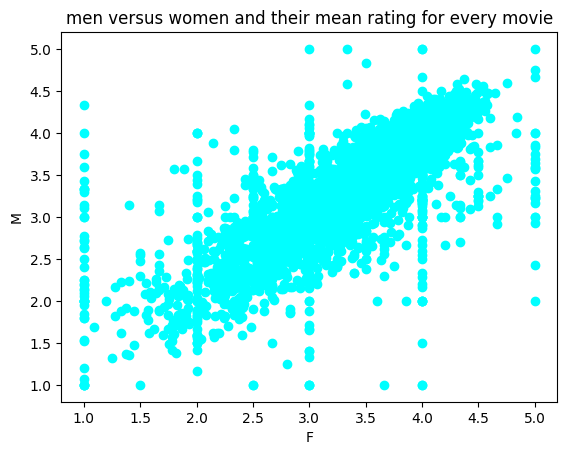

In [306]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
plt.scatter(mean_rating['F'], mean_rating['M'], c = 'cyan')
plt.xlabel('F')
plt.ylabel('M')
plt.title('men versus women and their mean rating for every movie')
plt.show()

In [150]:
len(mean_rating)

3706

In [148]:
mean_rating.reset_index()

Gender,Title,F,M
0,"$1,000,000 Duck (1971)",3.375000,2.761905
1,'Night Mother (1986),3.388889,3.352941
2,'Til There Was You (1997),2.675676,2.733333
3,"'burbs, The (1989)",2.793478,2.962085
4,...And Justice for All (1979),3.828571,3.689024
...,...,...,...
3701,"Zed & Two Noughts, A (1985)",3.500000,3.380952
3702,Zero Effect (1998),3.864407,3.723140
3703,Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000
3704,Zeus and Roxanne (1997),2.777778,2.357143


In [116]:
avg_rating

,Title,Rating
0,"$1,000,000 Duck (1971)",3.027027
1,'Night Mother (1986),3.371429
2,'Til There Was You (1997),2.692308
3,"'burbs, The (1989)",2.910891
4,...And Justice for All (1979),3.713568
...,...,...
3701,"Zed & Two Noughts, A (1985)",3.413793
3702,Zero Effect (1998),3.750831
3703,Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000
3704,Zeus and Roxanne (1997),2.521739


In [115]:
M_avg

,Title,Rating
0,"$1,000,000 Duck (1971)",2.761905
1,'Night Mother (1986),3.352941
2,'Til There Was You (1997),2.733333
3,"'burbs, The (1989)",2.962085
4,...And Justice for All (1979),3.689024
...,...,...
3666,"Zed & Two Noughts, A (1985)",3.380952
3667,Zero Effect (1998),3.723140
3668,Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000
3669,Zeus and Roxanne (1997),2.357143


### A scatter plot of men versus women and their mean rating for movies rated more than 200 times

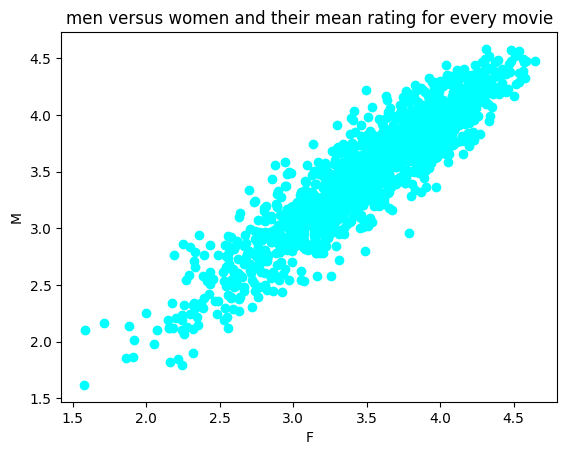

In [307]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
count_title = movieDf.groupby('Title').size()
active_title = mean_rating.index[count_title >= 200]
Gender_mean_rating_200up = mean_rating.loc[active_title]
df = Gender_mean_rating_200up
plt.scatter(df['F'], df['M'], c = 'cyan')
plt.xlabel('F')
plt.ylabel('M')
plt.title('men versus women and their mean rating for every movie')
plt.show()

### The correlation coefficent between the ratings of men and women

In [158]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
#-------------------------------
corr_gender_rating = mean_rating.corr()
print(corr_gender_rating)

print("-"*50)

corr_gender_rating_200up = Gender_mean_rating_200up.corr()
print(corr_gender_rating_200up)

Gender        F        M
Gender                  
F       1.00000  0.76319
M       0.76319  1.00000
--------------------------------------------------
Gender         F         M
Gender                    
F       1.000000  0.918963
M       0.918963  1.000000


## Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender

Example<br>
Conjecture 1: Men and women are more similar when they are older, consider their rating over the same genres.

Conjecture 2: Men and women more similar when they are academic/educator, artist, college/grad student, and programmer.

Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller.

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




In [159]:
movieDf

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


##Conjecture On Age

- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

In [203]:
age_56 = movieDf[movieDf['Age'] == 56]

In [209]:
action_56 = movieDf[movieDf['Genres'] == 'Action']

In [204]:
age_56

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
53,2,1357,5,978298709,M,56,16,70072,Shine (1996),Drama|Romance
54,2,3068,4,978299000,M,56,16,70072,"Verdict, The (1982)",Drama
55,2,1537,4,978299620,M,56,16,70072,Shall We Dance? (Shall We Dansu?) (1996),Comedy
56,2,647,3,978299351,M,56,16,70072,Courage Under Fire (1996),Drama|War
57,2,2194,4,978299297,M,56,16,70072,"Untouchables, The (1987)",Action|Crime|Drama
...,...,...,...,...,...,...,...,...,...,...
999740,6038,1387,2,956707005,F,56,1,14706,Jaws (1975),Action|Horror
999741,6038,2700,1,956715051,F,56,1,14706,"South Park: Bigger, Longer and Uncut (1999)",Animation|Comedy
999742,6038,2716,3,956707604,F,56,1,14706,Ghostbusters (1984),Comedy|Horror
999743,6038,3396,3,956706827,F,56,1,14706,"Muppet Movie, The (1979)",Children's|Comedy


In [205]:
mean_age_56 = age_56.pivot_table('Rating', index = 'Title', columns = 'Gender', aggfunc= 'mean').dropna()

In [212]:
mean_ac_56 = action_56.pivot_table('Rating', index = 'Title', columns = 'Gender', aggfunc= 'mean')

In [215]:
mean_ac_56.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, American Strays (1996) to Zero Kelvin (Kjærlighetens kjøtere) (1995)
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       57 non-null     float64
 1   M       62 non-null     float64
dtypes: float64(2)
memory usage: 3.5+ KB


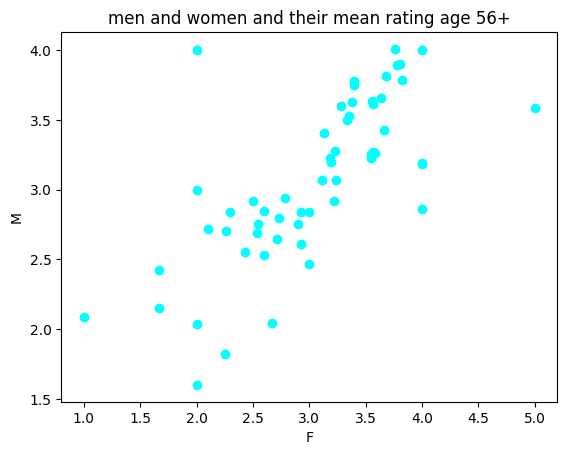

In [213]:
df = mean_ac_56
plt.scatter(df['F'], df['M'], c = 'cyan')
plt.xlabel('F')
plt.ylabel('M')
plt.title('men and women and their mean rating age 56+')
plt.show()

In [208]:
mean_age_56.corr()

Gender,F,M
Gender,,
F,1.000000,0.413094
M,0.413094,1.000000


##Conjecture: genre thriller ทั้งสองเพศจะให้เรตติ้งใกล้เคียงกัน

In [179]:
genre_thriller = movieDf[movieDf['Genres'] == 'Thriller']

In [182]:
mean_gen_thriller = genre_thriller.pivot_table('Rating', index = 'Title', columns = 'Gender', aggfunc= 'mean').dropna()

In [183]:
mean_gen_thriller


Gender,F,M
Title,,
"39 Steps, The (1935)",3.965517,4.107692
8MM (1999),2.906250,2.850962
Arlington Road (1999),3.512658,3.502101
Assassins (1995),2.894737,2.850467
"Assignment, The (1997)",3.571429,3.595238
...,...,...
Torn Curtain (1966),3.250000,3.357143
Trial by Jury (1994),2.571429,2.631579
Turbulence (1997),2.444444,2.261905


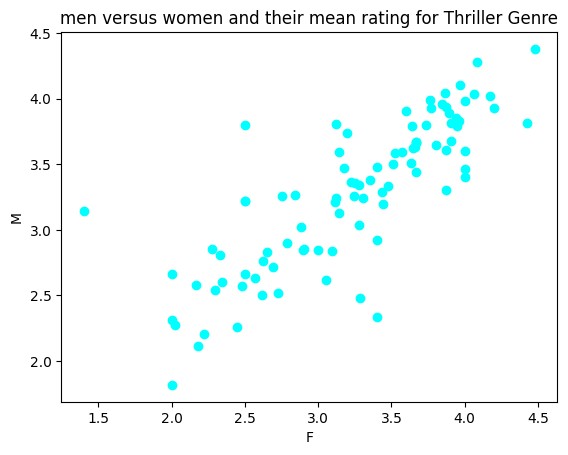

In [186]:
df = mean_gen_thriller
plt.scatter(df['F'], df['M'], c = 'cyan')
plt.xlabel('F')
plt.ylabel('M')
plt.title('men and women and their mean rating for Thriller Genre')
plt.show()

In [184]:
cor_thriller = mean_gen_thriller.corr()

In [185]:
cor_thriller

Gender,F,M
Gender,,
F,1.000000,0.813697
M,0.813697,1.000000


In [187]:
from statsmodels.stats.weightstats import ztest as ztest

In [188]:
ztest(mean_gen_thriller['F'], mean_gen_thriller['M'], value=0)

(-0.49475468885352775, 0.6207732923224007)

ยอมรับ H0: ค่าเฉลี่ย rating genre Thriller ทั้งสองเพศไม่ต่างกัน

##Conjecture on  Occupation

 Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

##Conjecture on Genres

- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

# Problem 4:
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

### For example, which movie to make/buy? (seperating via Genre?)

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------




In [314]:
movieDf

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [334]:
mean_genre = movieDf.pivot_table('Rating', index = 'Genres', aggfunc= 'mean').reset_index().dropna()

In [368]:
mean_genre = movieDf.pivot_table('Rating', index = 'Genres', aggfunc= 'mean').reset_index().dropna()

In [411]:
age_mean_genre = movieDf.pivot_table('Rating', index = 'Genres', columns = 'Age', aggfunc= 'mean').reset_index()

In [413]:
age_mean_genre

Age,Genres,1,18,25,35,45,50,56
0,Action,3.393617,3.233253,3.282209,3.460765,3.442227,3.527273,3.566745
1,Action|Adventure,3.632035,3.636634,3.713771,3.642051,3.598513,3.734525,3.764706
2,Action|Adventure|Animation,4.636364,4.250000,4.059211,4.150000,3.846154,3.888889,3.800000
3,Action|Adventure|Animation|Children's|Fantasy,2.875000,2.588235,2.411765,2.814815,3.000000,3.333333,3.000000
4,Action|Adventure|Animation|Horror|Sci-Fi,3.600000,3.433962,3.620462,3.531034,3.125000,3.888889,3.250000
...,...,...,...,...,...,...,...,...
296,Sci-Fi|Thriller|War,3.666667,3.647059,3.269231,3.432432,3.350000,3.717391,3.454545
297,Sci-Fi|War,4.514286,4.471795,4.407950,4.474227,4.436242,4.530303,4.425287
298,Thriller,3.554156,3.393555,3.528716,3.608804,3.647098,3.744361,3.704969
299,War,3.666667,3.765432,3.848485,3.872807,3.801282,4.020942,4.000000


In [415]:
drama = age_mean_genre[age_mean_genre['Genres'].str.contains('Drama')]

In [416]:
drama.set_index('Genres')

Age,1,18,25,35,45,50,56
Genres,,,,,,,
Action|Adventure|Crime|Drama,3.703704,3.853503,3.602941,3.397727,3.489130,3.365854,3.600000
Action|Adventure|Drama,3.514286,3.013468,3.027331,3.476879,3.450382,3.890511,3.773333
Action|Adventure|Drama|Romance,3.888889,2.891304,2.788732,3.134615,3.090909,3.148148,3.000000
Action|Adventure|Drama|Sci-Fi|War,4.184783,4.442142,4.390306,4.153846,4.137168,4.033981,4.123894
Action|Adventure|Drama|Thriller,4.000000,3.500000,3.360000,3.436364,3.407407,3.521739,3.500000
...,...,...,...,...,...,...,...
Drama|Sci-Fi|Thriller,3.627907,3.582609,3.534328,3.487719,3.347458,3.406977,3.243902
Drama|Thriller,3.802564,3.718952,3.748082,3.810184,3.840264,3.889956,3.942159
Drama|Thriller|War,3.823529,3.736196,3.772487,3.658416,3.951220,3.860465,3.888889


In [417]:
drama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 17 to 263
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Genres  78 non-null     object 
 1   1       76 non-null     float64
 2   18      78 non-null     float64
 3   25      78 non-null     float64
 4   35      78 non-null     float64
 5   45      78 non-null     float64
 6   50      78 non-null     float64
 7   56      77 non-null     float64
dtypes: float64(7), object(1)
memory usage: 5.5+ KB


In [418]:
drama

Age,Genres,1,18,25,35,45,50,56
17,Action|Adventure|Crime|Drama,3.703704,3.853503,3.602941,3.397727,3.489130,3.365854,3.600000
19,Action|Adventure|Drama,3.514286,3.013468,3.027331,3.476879,3.450382,3.890511,3.773333
20,Action|Adventure|Drama|Romance,3.888889,2.891304,2.788732,3.134615,3.090909,3.148148,3.000000
21,Action|Adventure|Drama|Sci-Fi|War,4.184783,4.442142,4.390306,4.153846,4.137168,4.033981,4.123894
22,Action|Adventure|Drama|Thriller,4.000000,3.500000,3.360000,3.436364,3.407407,3.521739,3.500000
...,...,...,...,...,...,...,...,...
259,Drama|Sci-Fi|Thriller,3.627907,3.582609,3.534328,3.487719,3.347458,3.406977,3.243902
260,Drama|Thriller,3.802564,3.718952,3.748082,3.810184,3.840264,3.889956,3.942159
261,Drama|Thriller|War,3.823529,3.736196,3.772487,3.658416,3.951220,3.860465,3.888889
262,Drama|War,4.133803,4.067355,4.075913,4.121664,4.102547,4.106157,4.193231


In [377]:
drama_dif = drama['F'].mean() - drama['M'].mean()

In [379]:
drama_dif

-0.006838426464077063

In [308]:
active_genre = mean_genre.index[count_genre >= 200]
genre_real = mean_genre.loc[active_genre]
top_genre = genre_real.sort_values(by = 'Rating', ascending=False).head(10)
top_genre

,Genres,Rating
155,Animation|Comedy|Thriller,4.473837
297,Sci-Fi|War,4.449890
143,Animation,4.394336
268,Film-Noir|Mystery,4.367424
141,Adventure|War,4.346107
270,Film-Noir|Romance|Thriller,4.294382
21,Action|Adventure|Drama|Sci-Fi|War,4.292977
271,Film-Noir|Sci-Fi,4.273333
226,Crime|Film-Noir,4.264129
266,Film-Noir,4.258105


In [297]:
active_genre_muen = mean_genre.index[count_genre >= 10000]
genre_real_muen = mean_genre.loc[active_genre_muen]
top_genre_muen = genre_real_muen.sort_values(by = 'Rating', ascending=False).head(10)
top_genre_muen

,Genres,Rating
262,Drama|War,4.098936
73,Action|Drama|War,4.047693
217,Crime|Drama,3.947094
260,Drama|Thriller,3.782552
239,Drama,3.780611
185,Comedy|Drama,3.720559
1,Action|Adventure,3.676814
187,Comedy|Drama|Romance,3.675129
87,Action|Sci-Fi|Thriller,3.664281
252,Drama|Romance,3.605417


In [299]:
active_genre_saen = mean_genre.index[count_genre >= 100000]
genre_real_saen = mean_genre.loc[active_genre_saen]
top_genre_saen = genre_real_saen.sort_values(by = 'Rating', ascending=False).head(10)
top_genre_saen

,Genres,Rating
239,Drama,3.780611
176,Comedy,3.464456


#สรุปผลการ คิดวิเคราะห์


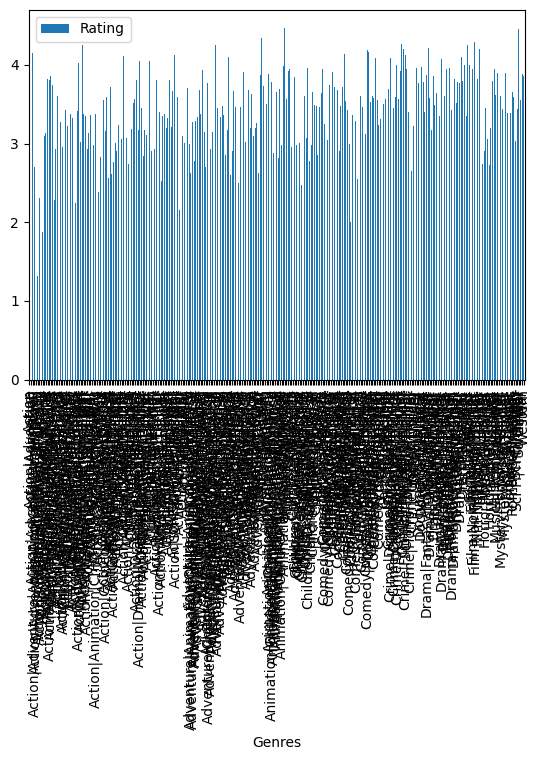

In [305]:
bar_oc = mean_genre.plot.bar(x='Genres',y='Rating')

# Done!

**What do you need to submit?**

* **Notebook File**: This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.


* **PPT Slides**: please prepare PPT slides (10 minutes)
    * Motivation about the data collection, why the topic is interesting to you. อธิบายเกี่ยวกับข้อมูล สร้างแรงบันดาลใจเดี่ยวกับข้อมูลให้ผู้รับฟัง ให้ผู้ฟังเข้าใจความเป็นมาและความสำคัญของข้อมูล
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What conjectures did you make and how did you support or disprove them using data?
    * Communicating Results with figures or tables
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report)
     
**How to submit:**

        ส่ง link ของ ipynb และ slides ในรูปแบบ pdf ใน Google Classroom
        
**Note: Each team just needs only one submission**